### Assignment 1 : Reinforcement Learning Programming - CSCN8020

### Problem 1
***Pick-and-Place Robot***: Consider using reinforcement learning to control the motion of a robot arm
in a repetitive pick-and-place task. If we want to learn movements that are fast and smooth, the
learning agent will have to control the motors directly and obtain feedback about the current positions
and velocities of the mechanical linkages.
Design the reinforcement learning problem as an MDP, define states, actions, rewards with reasoning.

##### States

1. **Initialize** <br>
- For the robotic arm, when it is powered on, It should validate if all the joints for movement and griper to hold the object are working properly. 
- It should also validate surrounding environment if there is any obstacles are available or not. If there is any object, it should calibrate the configuration that does not damage the arm during the movement
<br>
    **Actions**
    1. validate_system
    2. scan_environment
    3. calibrate_arm
    4. proceed_to_ready
    5. trigger_warning

2. **Display Warning** <br>
- During the initialization, if any issue is found in configuration or calibration, It should display warning the operator / monitoring system / monitoring authority.
<br>
    **Actions**
    1. send_alert
    2. retry_initialization

3. **Ready**<br>
- When robot has passed all initialization steps successfully and ready to perform its tasks. 
- Identify where gripper of robotic arm is located currently.
- Check if gripper already hold object or not
<br>
    **Actions**
    1. locate_gripper
    2. check_grip_status
    3. scan_for_object
    4. proceed_to_drop

4. **Scan for object**<br>
- Scan for the object to pick up
- If more than one object is found, Choose closest one
- Once object is selected, validate its dimension if it can be fixed in gripper.
<br>
    **Actions**
    1. perform_object_detection
    2. select_closest_object
    3. validate_object_fit
    4. proceed_to_pick
    5. retry_scan

5. **Pick object**<br>
- Calculate distance from current arm position to object 
- Create movement strategy to move the arm towards the object
- Pick the object 
<br>
    **Actions**
    1. compute_trajectory
    2. move_to_object
    3. engage_gripper
    4. validate_grasp
    5. proceed_to_drop
    6. trigger_error

6. **Drop Object**
- Move arm to the target location
- Drop object to the target position
- Check if gripper is empty
<br>
    **Actions**
    1. plan_drop_path
    2. move_to_target
    3. release_gripper
    4. confirm_release
    5. proceed_to_ready
    6. trigger_error

8. **Display Error**
- In failure of performing any actions, display error
<br>
    **Actions**
    1. send_alert

##### Rewards

| Action | Reward | Reason |
|--------|--------|--------|
|Successful object pickup | +10| for successfully grasping an object.|
|Successful object drop | +10|for placing the object at the target location.|
|Efficient movement (valid scan, trajectory, or action)| +5|Encourages optimal motion and correct execution of steps.|
|Error occurrence (failed grasp, drop, or movement)| -10|Penalizes failures that disrupt the workflow.|
|Unnecessary retries or delays| -5|Discourages redundant actions like excessive scanning or re-attempting the same failed action.|

##### State Diagram

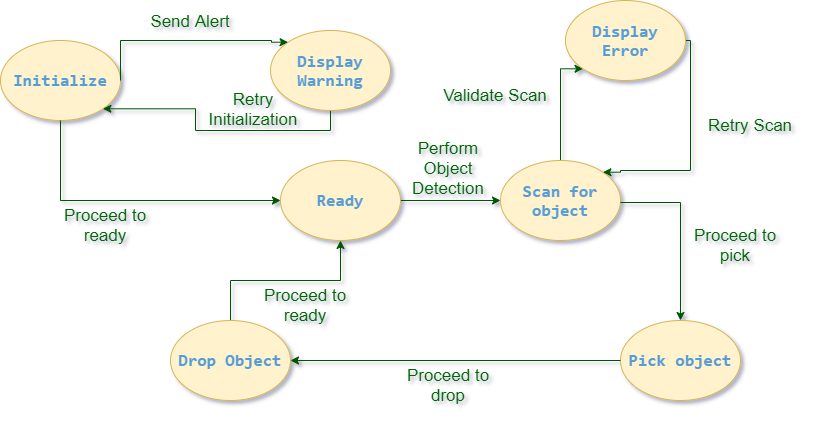

### Problem 2

**2x2 Gridworld**
Consider a 2x2 gridworld with the following characteristics:
<br>
<br>
**State Space (S)**: s1, s2, s3, s4.
<br>

**Action Space (A)**: up, down, left, right.

**Initial Policy (π):** 
For all states, π(up|s) = 1.

**Transition Probabilities P(s′|s, a):**
- If the action is valid (does not run into a wall), the transition is deterministic.
- Otherwise, s′ = s.

**Rewards R(s):**
- R(s1) = 5 for all actions a.
- R(s2) = 10 for all actions a.
- R(s3) = 1 for all actions a.
- R(s4) = 2 for all actions a.
<br>
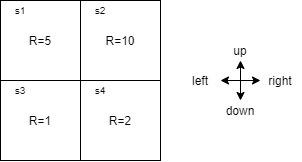

##### Considerations

1. **Discount Factor (γ)**: Assume γ = 1
2. **Initialize** value function with **0** for all states
<br/>
V(S<sub>1</sub>) = V(S<sub>2</sub>) = V(S<sub>3</sub>) = V(S<sub>4</sub>) = 0

3. For all states, **π(up|s) = 1** means that agent always takes the **up** action
4. We will be using **Bellmen's Equation** to calculate value function updates
<br/>
$$
V^*(s) = \max_a \sum_{s'} P(s' | s, a) \left[ R(s, a, s') + \gamma V^*(s') \right]
$$

##### Initial State
As considered, in initial state, value function for all state is 0

V(S<sub>1</sub>) = V(S<sub>2</sub>) = V(S<sub>3</sub>) = V(S<sub>4</sub>) = 0

- As, all actions in initial policy is **up**, ( 𝜋(up∣𝑠)=1 ), In iteration 1, Update the value function considering action **up**
##### Iteration 1

- Using the Bellman equation for each state, we compute the new value function for each state

V<sub>1</sub>(S<sub>1</sub>) = R(S<sub>1</sub>) + γV<sub>0</sub>(S<sub>1</sub>) <br/>
= 5 + (1 × V<sub>0</sub>(S<sub>1</sub>))<br/>
​= 5 + 0<br/>
= 5<br/>

V<sub>1</sub>(S<sub>2</sub>)  = R(S<sub>2</sub>) + γV<sub>0</sub>(S<sub>2</sub>)<br/>
= 10 + (1 × V<sub>0</sub>(S<sub>2</sub>))<br/>
​= 10 + 0<br/>
= 10<br/>

V<sub>1</sub>(S<sub>3</sub>)  = R(S<sub>3</sub>) + γV<sub>0</sub>(S<sub>3</sub>)<br/>
= 1 + (1 × V<sub>0</sub>(S<sub>3</sub>))<br/>
​= 1 + 0<br/>
= 1<br/>

V<sub>1</sub>(S<sub>4</sub>)  = R(S<sub>4</sub>) + γV<sub>0</sub>(S<sub>4</sub>)<br/>
= 2 + (1 × V<sub>0</sub>(S<sub>4</sub>))<br/>
​= 2 + 0<br/>
= 2<br/>

##### Iteration 2

V<sub>2</sub>(S<sub>1</sub>) = R(S<sub>1</sub>) + γV<sub>1</sub>(S<sub>1</sub>)<br/>
= 5 + (1 × V<sub>1</sub>(S<sub>1</sub>))<br/>
​= 5 + 5<br/>
= 10<br/>

V<sub>2</sub>(S<sub>2</sub>) = R(S<sub>2</sub>) + γV<sub>1</sub>(S<sub>2</sub>)<br/>
= 10 + (1 × V<sub>1</sub>(S<sub>2</sub>))<br/>
​= 10 + 10<br/>
= 20<br/>

V<sub>2</sub>(S<sub>3</sub>) = R(S<sub>3</sub>) + γV<sub>1</sub>(S<sub>3</sub>) <br/>
= 1 + (1 × V<sub>1</sub>(S<sub>3</sub>))<br/>
​= 1 + 5<br/>
= 6<br/>

V<sub>2</sub>(S<sub>4</sub>) = R(S<sub>4</sub>) + γV<sub>1</sub>(S<sub>4</sub>) <br/>
= 2 + (1 × V<sub>1</sub>(S<sub>4</sub>))<br/>
​= 2 + 10<br/>
= 12<br/>

##### Iterations Summary


| Iteration | Action | (S₁) Transition | (S₁) Value Function | (S₂) Transition | (S₂) Value Function | (S₃) Transition | (S₃) Value Function | (S₄) Transition | (S₄) Value Function |
|-----------|--------|----------------|----------------------|----------------|----------------------|----------------|----------------------|----------------|----------------------|
| **0** (initial)    | -      | -              | V<sub>0</sub>(S<sub>1</sub>) = **0**                | -              |V<sub>0</sub>(S<sub>2</sub>) = **0**                | -              | V<sub>0</sub>(S<sub>3</sub>) = **0**                | -              | V<sub>0</sub>(S<sub>4</sub>) = **0**                |
| **1**     | Up     | S₁ → S₁        | V<sub>1</sub>(S<sub>1</sub>) = **5**                | S₂ → S₂        |V<sub>1</sub>(S<sub>2</sub>) = **10**               | S₃ → S₁        | V<sub>1</sub>(S<sub>3</sub>) = **1**                | S₄ → S₂        |  V<sub>1</sub>(S<sub>4</sub>) = **2**               |
| **2**     | Up     | S₁ → S₁        | V<sub>2</sub>(S<sub>1</sub>) = **10**               | S₂ → S₂        |V<sub>2</sub>(S<sub>2</sub>) =  **20**               | S₃ → S₁        | V<sub>2</sub>(S<sub>3</sub>) = **6**               | S₄ → S₂        |  V<sub>2</sub>(S<sub>4</sub>) = **12**               |



- Value is increased with each iteration but agent is not yet convergent towards the optimal values in 2 iterations, so, at this stage, policy improvement should not be done.

### Problem 3

**5x5 Gridworld**<br/>

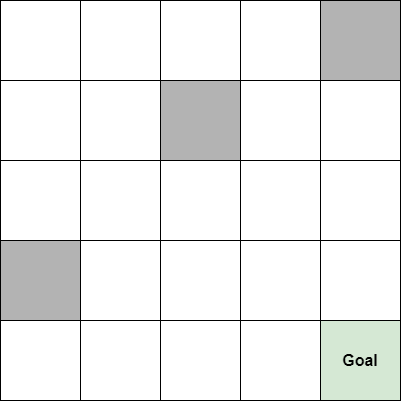

**States**: 
states are identified by their row and column, the same as a regular matrix. Ex: the state in row 0 and column 3 is s0,3
- **Terminal/Goal state**: The episode ends if the agent reached this state. sGoal = s4,4
- **Grey states**: {s2,2, s3,0, s0,4}, these are valid but non-favourable states, as will be seen in the reward function.
- **Actions**: a1 = right, a2 = down, a3 = down, a4 = up for all states.
- **Transitions**: If an action is valid, the transition is deterministic, otherwise s′ = s
- **Rewards R(s)**:
R(s) 
= +10 , s = s4,4
= −5  , s ∈ Sgrey = s2,2, s3,0, s0,4
= −1  , s ∈ S ̸= s4,4, Sgrey

##### Gridword class dafination updates

In [1]:
#!/usr/bin/python3

import numpy as np
import matplotlib.pyplot as plt

ENV_SIZE = 5

class GridWorld():

    def __init__(self, env_size):
        self.env_size = env_size
        # Initialize the value function and set terminal state value to 0
        self.V = np.zeros((env_size, env_size))
        self.terminal_state = (4, 4)
        self.V[self.terminal_state] = 0

        # Define the transition probabilities and rewards
        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up
        self.action_description = ["Right", "Left", "Down", "Up"]
        self.gamma = 1.0  # Discount factor
        self.reward = -1  # Reward for non-terminal states
        self.pi_greedy = np.zeros((self.env_size, self.env_size), dtype=int)

       # Initialize terminal and grey state rewards
        self.terminal_reward = 10  # Reward for terminal state (4,4)
        self.grey_reward = -5     # Reward for grey states (2,2), (3,0), (0,4)
        self.default_reward = -1  # Reward for regular states
        
        # List of grey states
        self.grey_states = [(2, 2), (3, 0), (0, 4)]
        
        # Define the transition probabilities and rewards
        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up
        self.action_description = ["Right", "Left", "Down", "Up"]
        self.gamma = 1.0  # Discount factor
        self.pi_greedy = np.zeros((self.env_size, self.env_size), dtype=int)
    
    def get_reward(self, i, j):
        if (i, j) == self.terminal_state:
            return self.terminal_reward
        elif (i, j) in self.grey_states:

            return self.grey_reward
        else:
            return self.default_reward

    '''@brief Checks if there is the change in V is less than preset threshold
    '''
    def is_done(self, i, j):
        pass
    
    '''@brief Returns True if the state is a terminal state
    '''
    def is_terminal_state(self, i, j):
        return (i, j) == self. terminal_state
    
    '''
    @brief Overwrites the current state-value function with a new one
    '''
    def update_value_function(self, V):
        self.V = np.copy(V)

    '''
    @brief Returns the full state-value function V_pi
    '''
    def get_value_function(self):
        return self.V

    '''@brief Returns the stored greedy policy
    '''
    def get_policy(self):
        return self.pi_greedy
    
    '''@brief Prints the policy using the action descriptions
    '''
    def print_policy(self):
        action_symbols = ["→", "←", "↓", "↑"]  # Right, Left, Down, Up
        for i in range(self.env_size):
            row = ""
            for j in range(self.env_size):
                if self.is_terminal_state(i, j):
                    row += " T  "  # Terminal state
                else:
                    action_index = self.pi_greedy[i, j]
                    row += f" {action_symbols[action_index]}  "
            print(row)

    '''@brief Calculate the maximim value by following a greedy policy
    '''
    def calculate_max_value(self, i, j):
        # Start with a very low value as the maximum
        max_value = float('-inf')
        best_action = None
        best_actions_str = ""

        # Loop through all actions
        for action_index in range(len(self.actions)):
            next_i, next_j = self.step(action_index, i, j)
            if self.is_valid_state(next_i, next_j):
                # Get the reward for the next state using get_reward
                reward = self.get_reward(next_i, next_j)
                
                # Update max_value if we find a higher value
                value = reward + self.gamma * self.V[next_i, next_j]
                if value > max_value:
                    max_value = value
                    best_action = action_index
                    best_actions_str = self.action_description[action_index]

        return max_value, best_action, best_actions_str
    
    '''@brief Returns the next state given the chosen action and current state
    '''
    def step(self, action_index, i, j):
        # We are assuming a Transition Probability Matrix where
        # P(s'|s) = 1.0 for a single state and 0 otherwise
        action = self.actions[action_index]
        return i + action[0], j + action[1]
    
    '''@brief Checks if a state is within the acceptable bounds of the environment
    '''
    def is_valid_state(self, i, j):
        valid = 0 <= i < self.env_size and 0 <= j < self.env_size
        return valid
    
    # def update_greedy_policy(self):
    #     for i in range(ENV_SIZE):
    #         for j in range(ENV_SIZE):
    #             # TODO: calculate the greedy policy and populate self.pi_greedy

    #             # TODO: Optional - Add the optimal action description to self.pi_str to be able to print it
    #             pass
        
    def value_iteration(self, threshold=0.01, num_iterations=1000):
        for iteration in range(num_iterations):
            V_copy = np.copy(self.V)
            
            # Iterate over all states
            for i in range(self.env_size):
                for j in range(self.env_size):
                    if self.is_terminal_state(i, j):
                        continue  # Skip terminal states
                    
                    # Compute max value for this state
                    max_value, best_action, _ = self.calculate_max_value(i, j)
                    V_copy[i, j] = max_value
                    
                    # Update the greedy policy
                    self.pi_greedy[i, j] = best_action

            # Check for convergence (change in value function)
            if np.max(np.abs(V_copy - self.V)) < threshold:
                print(f"Converged after {iteration} iterations.")
                break

            self.update_value_function(V_copy)  # Update the value function

    def value_iterationOptimized(self, threshold=1e-4, num_iterations=1000):
        for _ in range(num_iterations):
            delta = 0  # Track the maximum change
            
            for i in range(self.env_size):
                for j in range(self.env_size):
                    if self.is_terminal_state(i, j):
                        continue  # Skip terminal state
                    
                    # Compute max value for this state
                    max_value, best_action, _ = self.calculate_max_value(i, j)

                    # Update the value function in-place
                    old_value = self.V[i, j]
                    self.V[i, j] = max_value
                    
                    # Track the max change across states
                    delta = max(delta, abs(old_value - max_value))

                    # Store best action in greedy policy
                    self.pi_greedy[i, j] = best_action

            # Stop if values have converged
            if delta < threshold:
                break

# Visualization of the value function and policy
def plot_grid(gridworld):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xticks(np.arange(0, gridworld.env_size, 1))
    ax.set_yticks(np.arange(0, gridworld.env_size, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_xlim([0, gridworld.env_size])
    ax.set_ylim([0, gridworld.env_size])
    ax.grid(which='both')

    # Plot the value function
    V = gridworld.get_value_function()
    for i in range(gridworld.env_size):
        for j in range(gridworld.env_size):
            ax.text(j + 0.5, gridworld.env_size - i - 0.5, f'{V[i, j]:.2f}', ha='center', va='center', color='blue')

    # Plot the policy (action descriptions)
    pi = gridworld.get_policy()
    for i in range(gridworld.env_size):
        for j in range(gridworld.env_size):
            action = pi[i, j]
            if action == 0:
                ax.text(j + 0.5, gridworld.env_size - i - 0.5, '→', ha='center', va='center', color='green')
            elif action == 1:
                ax.text(j + 0.5, gridworld.env_size - i - 0.5, '←', ha='center', va='center', color='green')
            elif action == 2:
                ax.text(j + 0.5, gridworld.env_size - i - 0.5, '↓', ha='center', va='center', color='green')
            elif action == 3:
                ax.text(j + 0.5, gridworld.env_size - i - 0.5, '↑', ha='center', va='center', color='green')

    plt.show()

##### Update the reward function to be a list of reward based on whether the state is terminal, grey, or a regular state.

Reward function is defined as per the reward functions on gray, white and target cells.

In [2]:
from temp.value_iteration import GridWorld
ENV_SIZE = 5
gridworld = GridWorld(ENV_SIZE)

# Validate reward function
print("Reward for state (2,2):", gridworld.get_reward(2,2))  # Should print -5 (Gray state)
print("Reward for state (4,4):", gridworld.get_reward(4,4))  # Should print 10 (Target)
print("Reward for state (0,0):", gridworld.get_reward(0,0))  # Should print -1 (rest of cells)


Reward for state (2,2): -5
Reward for state (4,4): 10
Reward for state (0,0): -1


##### Run the existing code developed in class and obtain the optimal state-values and optimal policy. Provide a figures of the gridworld with the obtained V∗ and π∗

Defination for ```get_value_function()``` has been updated in ```gridworld``` class function

In [3]:
gridworld.value_iteration()

# Get the optimal value function
print("Optimal Value Function:\n", gridworld.get_value_function())


Converged after 8 iterations.
Optimal Value Function:
 [[ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]
 [ 5.  6.  7.  8.  9.]
 [ 6.  7.  8.  9. 10.]
 [ 7.  8.  9. 10.  0.]]


In [4]:
# Get the optimal value policy
gridworld.print_policy()

 →   →   →   ↓   ↓  
 →   →   →   →   ↓  
 →   ↓   →   →   ↓  
 →   →   →   →   ↓  
 →   →   →   →   T  


##### Implement the following variation of value iteration. Confirm that it reaches the same optimal statevalue function and policy.
1. In-Place Value Iteration: Use a single array to store the state values. This means that you update the value of a state and immediately use that updated value in the subsequent updates.

In [5]:
gridworld.value_iterationOptimized()
print("Optimal Value Function:\n", gridworld.get_value_function())

Optimal Value Function:
 [[ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]
 [ 5.  6.  7.  8.  9.]
 [ 6.  7.  8.  9. 10.]
 [ 7.  8.  9. 10.  0.]]


In [6]:
gridworld.print_policy()

 →   →   →   ↓   ↓  
 →   →   →   →   ↓  
 →   ↓   →   →   ↓  
 →   →   →   →   ↓  
 →   →   →   →   T  


##### Standard vs. In Place Value comparison

1. **In-Place Value Iteration** is **faster** compared to standard Iteration. 
2. **Number of iterations** are **higher** in **standard iteration**, whereas in-place has lower number of iterations. As a result, **In place converges faster than standard.**
3. As In place has lower iterations, it also require lower computational resources.

### Problem 5

##### 1. Generate multiple episodes using the behavior policy b(a|s).

Implement the off-policy Monte Carlo with Importance sampling algorithm to estimate the value function for the given gridworld. Use a fixed behavior policy b(a|s) (e.g., a random policy) to generate episodes and a greedy target policy.

##### Class definition

In [7]:
import numpy as np
import random

# Define the gridworld environment
class GridWorldMC:
    def __init__(self, size=5, terminal_states={(0, 0), (3, 3)}):
        self.size = size
        self.terminal_states = terminal_states
        self.actions = ['up', 'down', 'left', 'right']
    
    def step(self, state, action):
        if state in self.terminal_states:
            return state, 0, True  # Terminal state reached
        
        x, y = state
        if action == 'up':
            x = max(0, x - 1)
        elif action == 'down':
            x = min(self.size - 1, x + 1)
        elif action == 'left':
            y = max(0, y - 1)
        elif action == 'right':
            y = min(self.size - 1, y + 1)
        
        next_state = (x, y)
        reward = -1  # Default reward for each step
        done = next_state in self.terminal_states
        return next_state, reward, done
    
    def generate_episode(self, behavior_policy, max_steps=50):
        state = (random.randint(0, self.size - 1), random.randint(0, self.size - 1))
        while state in self.terminal_states:  # Ensure not starting in a terminal state
            state = (random.randint(0, self.size - 1), random.randint(0, self.size - 1))
        
        episode = []
        for _ in range(max_steps):
            action = random.choice(self.actions)  # Behavior policy (random)
            next_state, reward, done = self.step(state, action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        return episode
    
    def compute_returns(self, episode, gamma=0.9):
        returns = {}
        G = 0
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = reward + gamma * G
            returns[state] = G  # Store the return for each state
        return returns



##### 1. Generate multiple episodes using the behavior policy b(a|s).

In [8]:
# Generate multiple episodes
env = GridWorldMC()
num_episodes = 10
episodes = [env.generate_episode(env.actions) for _ in range(num_episodes)]

# Print sample episodes
for i, ep in enumerate(episodes[:20]):
    print(f"Episode {i+1}: {ep}\n")

Episode 1: [((2, 4), 'right', -1), ((2, 4), 'right', -1), ((2, 4), 'right', -1), ((2, 4), 'up', -1), ((1, 4), 'up', -1), ((0, 4), 'up', -1), ((0, 4), 'left', -1), ((0, 3), 'down', -1), ((1, 3), 'up', -1), ((0, 3), 'left', -1), ((0, 2), 'left', -1), ((0, 1), 'down', -1), ((1, 1), 'left', -1), ((1, 0), 'down', -1), ((2, 0), 'up', -1), ((1, 0), 'right', -1), ((1, 1), 'up', -1), ((0, 1), 'up', -1), ((0, 1), 'down', -1), ((1, 1), 'left', -1), ((1, 0), 'down', -1), ((2, 0), 'up', -1), ((1, 0), 'right', -1), ((1, 1), 'up', -1), ((0, 1), 'down', -1), ((1, 1), 'left', -1), ((1, 0), 'up', -1)]

Episode 2: [((1, 0), 'left', -1), ((1, 0), 'right', -1), ((1, 1), 'left', -1), ((1, 0), 'right', -1), ((1, 1), 'left', -1), ((1, 0), 'left', -1), ((1, 0), 'down', -1), ((2, 0), 'down', -1), ((3, 0), 'down', -1), ((4, 0), 'right', -1), ((4, 1), 'down', -1), ((4, 1), 'up', -1), ((3, 1), 'down', -1), ((4, 1), 'up', -1), ((3, 1), 'up', -1), ((2, 1), 'left', -1), ((2, 0), 'right', -1), ((2, 1), 'up', -1), ((1,

##### 3. Use importance sampling to estimate the value function and update the target policy π(a|s).

In [9]:
# Compute returns for each episode
returns_list = [env.compute_returns(ep) for ep in episodes]

# Print sample episodes and their returns
for i, (ep, ret) in enumerate(zip(episodes[:3], returns_list[:3])):
    print(f"Episode {i+1}: {ep}\n")
    print(f"Returns: {ret}\n")


Episode 1: [((2, 4), 'right', -1), ((2, 4), 'right', -1), ((2, 4), 'right', -1), ((2, 4), 'up', -1), ((1, 4), 'up', -1), ((0, 4), 'up', -1), ((0, 4), 'left', -1), ((0, 3), 'down', -1), ((1, 3), 'up', -1), ((0, 3), 'left', -1), ((0, 2), 'left', -1), ((0, 1), 'down', -1), ((1, 1), 'left', -1), ((1, 0), 'down', -1), ((2, 0), 'up', -1), ((1, 0), 'right', -1), ((1, 1), 'up', -1), ((0, 1), 'up', -1), ((0, 1), 'down', -1), ((1, 1), 'left', -1), ((1, 0), 'down', -1), ((2, 0), 'up', -1), ((1, 0), 'right', -1), ((1, 1), 'up', -1), ((0, 1), 'down', -1), ((1, 1), 'left', -1), ((1, 0), 'up', -1)]

Returns: {(1, 0): -7.7123207545039, (1, 1): -7.94108867905351, (0, 1): -8.14697981114816, (2, 0): -7.458134171671, (0, 2): -8.332281830033345, (0, 3): -8.784233454094307, (1, 3): -8.649148282327008, (0, 4): -9.01522909781639, (1, 4): -9.113706188034751, (2, 4): -9.4185026299696}

Episode 2: [((1, 0), 'left', -1), ((1, 0), 'right', -1), ((1, 1), 'left', -1), ((1, 0), 'right', -1), ((1, 1), 'left', -1), ((1

In [22]:
class OffPolicyMC:
    def __init__(self, env, gamma=0.9):
        self.env = env
        self.gamma = gamma
        self.Q = {}  # State-action value function
        self.C = {}  # Cumulative sum of weights

    def target_policy(self, state):
        return 'right'  # Example greedy policy always choosing 'right'

    def behavior_policy(self, state):
        return random.choice(self.env.actions)  # Random policy

    def importance_sampling_ratio(self, target_action, behavior_action):
        return 1.0 if target_action == behavior_action else 0.25  # Since behavior is random

    def update(self, episodes):
        for episode in episodes:
            G = 0
            W = 1
            for t in reversed(range(len(episode))):
                state, action, reward = episode[t]
                G = reward + self.gamma * G
                
                if (state, action) not in self.C:
                    self.C[(state, action)] = 0
                    self.Q[(state, action)] = 0
                
                if self.C[(state, action)] == 0 and W == 0:
                    continue  # Avoid division by zero
                
                self.C[(state, action)] += W
                self.Q[(state, action)] += (W / self.C[(state, action)]) * (G - self.Q[(state, action)])
                
                W *= self.importance_sampling_ratio(self.target_policy(state), action)
                if W == 0:
                    break
        
        return self.Q


##### Apply Off-policy Monte Carlo with Importance Sampling

In [23]:

mc = OffPolicyMC(env)
Q_values = mc.update(episodes)

# Print estimated Q-values
print("Estimated Q-values:")
for key, value in Q_values.items():
    print(f"{key}: {value}")

# Compute estimated state-value function V(s)
grid_size = env.size
V_values = np.zeros((grid_size, grid_size))

for x in range(grid_size):
    for y in range(grid_size):
        state = (x, y)
        action_values = [Q_values.get((state, action), 0) for action in env.actions]
        V_values[x, y] = max(action_values)

# Print the optimal value function
print("\nOptimal Value Function:")
print(V_values)


Estimated Q-values:
((1, 0), 'up'): -1.0
((1, 1), 'left'): -2.072582124925615
((0, 1), 'down'): -2.9894714992548868
((1, 1), 'up'): -2.0296566747827662
((1, 0), 'right'): -2.7915394325195715
((2, 0), 'up'): -4.6862667254507375
((1, 0), 'down'): -5.242930188722232
((0, 1), 'up'): -1.9075385801236258
((0, 2), 'left'): -2.7166586370323773
((0, 3), 'left'): -3.4509622281196974
((1, 3), 'up'): -7.463366183841087
((0, 3), 'down'): -6.408561722725127
((0, 4), 'left'): -5.225258972234237
((0, 4), 'up'): -8.004837183709817
((1, 4), 'up'): -8.332329521480279
((2, 4), 'up'): -9.202335569231277
((2, 4), 'right'): -8.41910405181937
((0, 1), 'left'): -1.0
((2, 1), 'up'): -2.7485883736574728
((3, 1), 'up'): -5.695328103751212
((2, 1), 'down'): -6.12579511
((2, 0), 'right'): -6.513224725988918
((1, 0), 'left'): -7.1757046353367935
((2, 2), 'left'): -3.4390171740398596
((1, 2), 'down'): -4.0961044361090755
((1, 1), 'right'): -4.6856039109722865
((2, 1), 'left'): -9.01522909781639
((4, 1), 'up'): -9.211

#### Comparison

| Method                                   | Convergence Time | Value Function Similarity | Number of Episodes | Computational Complexity | Stability & Variance |
|------------------------------------------|-----------------|--------------------------|---------------------|-------------------------|----------------------|
| **Monte Carlo**                          | Fast (8 iterations) | Consistent across runs   | Moderate (~10-100) | O(NT) (where N is episodes, T is steps) | High variance, requires many episodes |
| **Monte Carlo (In-Place Value Update)**  | Fast (8 iterations) | Same as MC               | Moderate (~10-100) | O(NT) | More stable than standard MC |
| **Off-Policy Monte Carlo (IS)**          | Slower            | Different from other MC  | High (~1000s)       | O(NT) + Importance Sampling Overhead | High variance due to IS weights |
